In [100]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [101]:
N=2
m = -2
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.Model(N=N, T=0, kind='dDSL', delta=[1,1], U=[0,0], nu=0, ns=[0.3,0.3], mu=[m,m])

In [102]:
dels, nus, mus = ham.Deltra(30,HF=True, alpha=0.7, Nmin=10, Nmax=200)

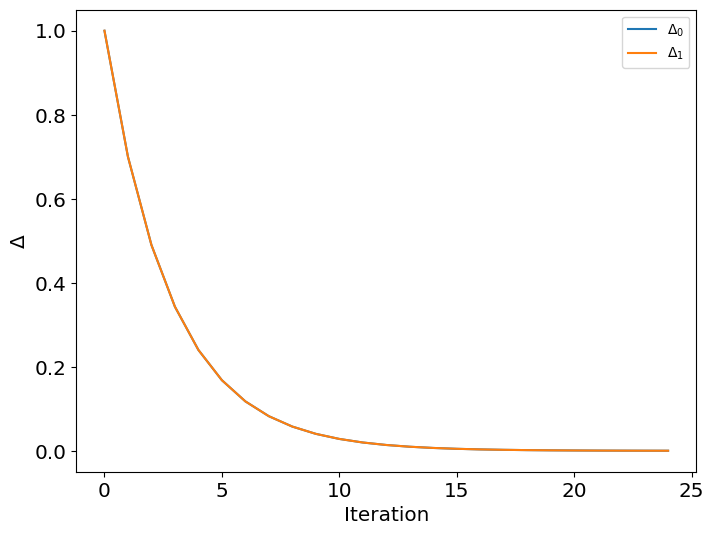

In [103]:
plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\Delta$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)

#plt.plot(np.arange(len(dels[0])), dels[0], label = r'$\Delta_A$')
#plt.plot(np.arange(len(dels[0])), dels[1], label = r'$\Delta_B$')
#plt.plot(np.arange(len(dels[0])), dels[2], label = r'$\Delta_C$')
for i,d in enumerate(dels):
    plt.plot(np.arange(len(dels[0])), np.real(d), label = f'$\Delta_{i}$')
    

plt.legend()

plt.show()

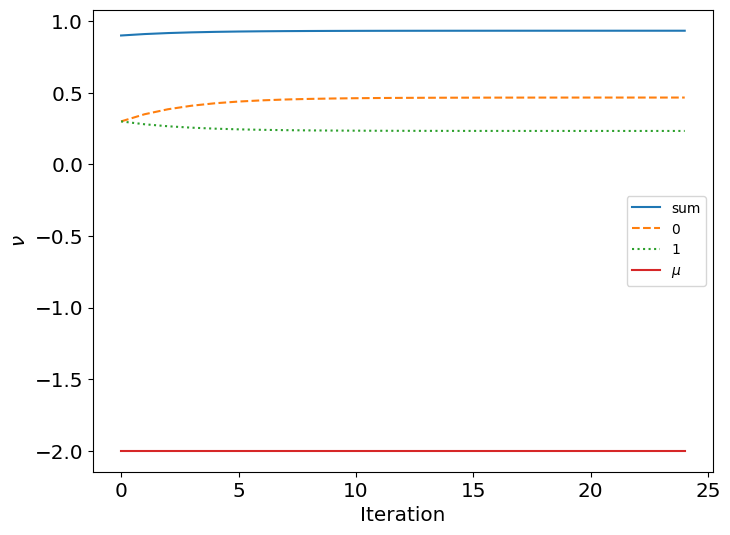

In [104]:
s1 = [np.sum(nus[:,i])+nus[1,i] for i in range(np.shape(nus)[1])]

plt.figure(figsize=(8,6))
plt.xlabel('Iteration', size='x-large')
plt.ylabel(r'$\nu$', size='x-large')
plt.xticks(size='x-large')
plt.yticks(size='x-large')
#plt.ylim(0,0.35)
colors=['dashed', 'dotted', 'dashdot']
plt.plot(np.arange(len(s1)), s1, label = r'sum')
for i in range(2):
    plt.plot(np.arange(len(s1)),nus[i],linestyle=colors[i], label=f'{i}')
plt.plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

plt.legend()
plt.show()

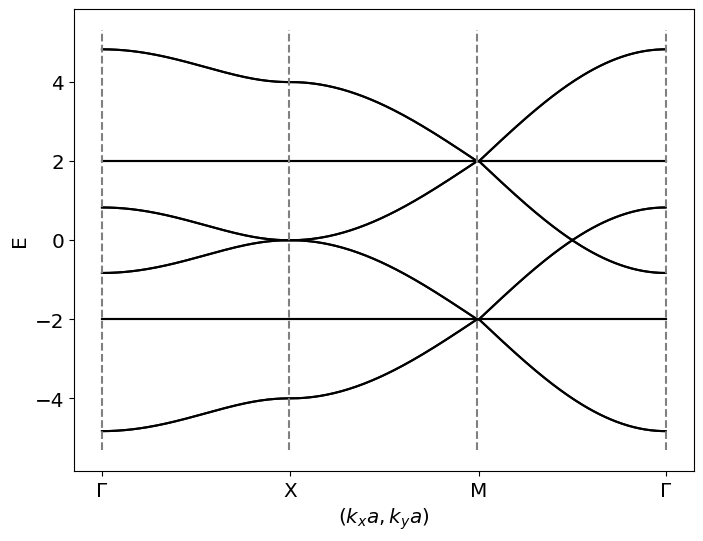

In [106]:
ham.plot_bands()

In [98]:
n=400
Earr = np.linspace(-4,4,n)
DOS = np.zeros(n)
for i in range(12):
    DOS+=ham.DOS(60, E=Earr, b=i, sig=0.004 ,p='all')


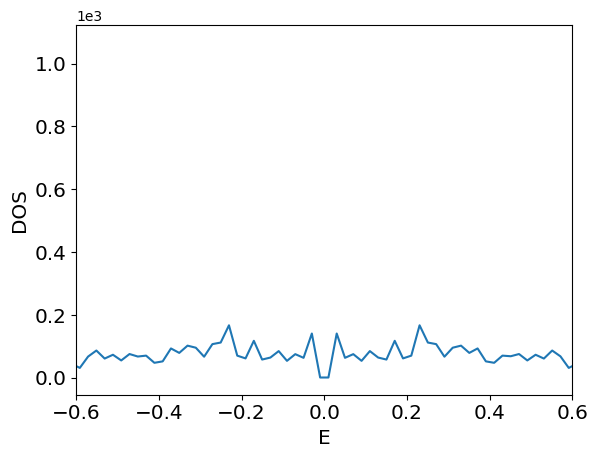

In [99]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
plt.xlim(-0.6, 0.6)
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.show()